In [ ]:
# 1. Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf


In [ ]:
# 2. Load dataset from external link
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)


In [ ]:
# 3. Check missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


Text(0.5, 1.0, 'Distribution of MEDV')

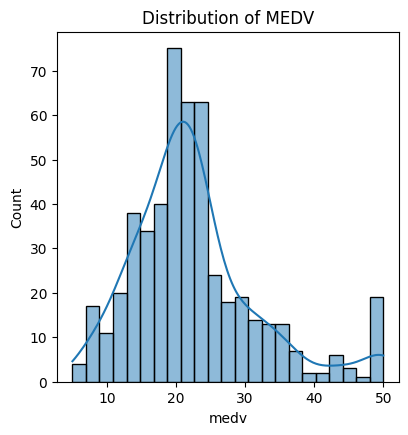

In [ ]:
# 4. Exploratory Data Analysis
plt.figure(figsize=(15, 10))
# Distribution of target
plt.subplot(2, 3, 1)
sns.histplot(df['medv'], kde=True)
plt.title('Distribution of MEDV')


Text(0.5, 1.0, 'Correlation Heatmap')

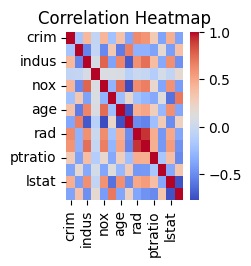

In [ ]:
# Correlation heatmap
plt.subplot(2, 3, 2)
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')


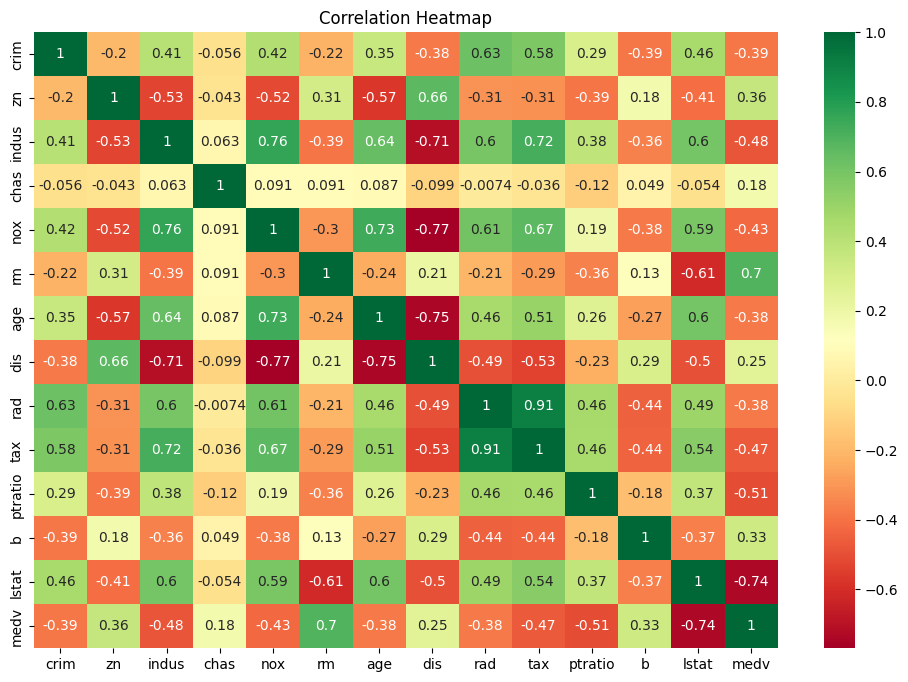

In [ ]:
# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Adjust the width and height as needed
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
plt.title('Correlation Heatmap')
plt.show()



Text(0.5, 1.0, 'RM vs MEDV')

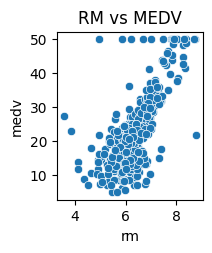

In [ ]:
# Scatter plots
plt.subplot(2, 3, 3)
sns.scatterplot(x='rm', y='medv', data=df)
plt.title('RM vs MEDV')


Text(0.5, 1.0, 'LSTAT vs MEDV')

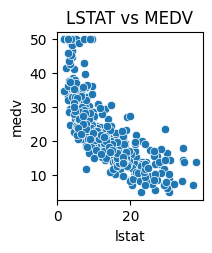

In [ ]:
plt.subplot(2, 3, 4)
sns.scatterplot(x='lstat', y='medv', data=df)
plt.title('LSTAT vs MEDV')


Text(0.5, 1.0, 'CHAS vs MEDV')

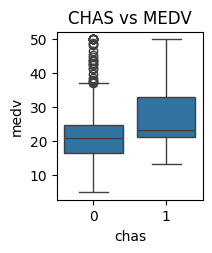

In [ ]:
plt.subplot(2, 3, 5)
sns.boxplot(x='chas', y='medv', data=df)
plt.title('CHAS vs MEDV')


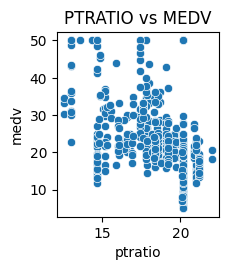

In [ ]:
plt.subplot(2, 3, 6)
sns.scatterplot(x='ptratio', y='medv', data=df)
plt.title('PTRATIO vs MEDV')
plt.tight_layout()
plt.show()


In [ ]:
# 5. EDA Summary Table
eda_summary = df.describe().T
eda_summary['missing'] = df.isnull().sum()
print("\nEDA Summary Table:\n", eda_summary)


EDA Summary Table:
          count        mean         std        min         25%        50%  \
crim     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
zn       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
indus    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
chas     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
nox      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
rm       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
age      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
dis      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
rad      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
tax      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
ptratio  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
b        506.0  356.674032   91.294864    0.32000  375.377500  391.

In [ ]:
# 6. Train-Test Split
X = df.drop('medv', axis=1)
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 7. Linear Regression - Method 1 (Sklearn)
lr = LinearRegression()
lr.fit(X_train, y_train)
print("\nSklearn Linear Regression Coefficients:\n", lr.coef_)
print("Intercept:", lr.intercept_)
print("Train R^2:", lr.score(X_train, y_train))
print("Test R^2:", lr.score(X_test, y_test))


Sklearn Linear Regression Coefficients:
 [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Intercept: 30.24675099392366
Train R^2: 0.7508856358979673
Test R^2: 0.6687594935356326


In [ ]:
# Create DataFrame of coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})

# Optional: sort by absolute value of coefficient
coeff_df['abs_coeff'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='abs_coeff', ascending=False).drop(columns='abs_coeff')

print(coeff_df)

    Feature  Coefficient
4       nox   -17.202633
5        rm     4.438835
3      chas     2.784438
7       dis    -1.447865
10  ptratio    -0.915456
12    lstat    -0.508571
8       rad     0.262430
0      crim    -0.113056
2     indus     0.040381
1        zn     0.030110
11        b     0.012351
9       tax    -0.010647
6       age    -0.006296


In [ ]:
# Predict on test data
y_pred = lr.predict(X_test)

# Create a DataFrame with actual, predicted, and error
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Error': y_test.values - y_pred
})

# Display first 10 rows
print(results.head(10))

   Actual  Predicted     Error
0    23.6  28.996724 -5.396724
1    32.4  36.025565 -3.625565
2    13.6  14.816944 -1.216944
3    22.8  25.031979 -2.231979
4    16.1  18.769880 -2.669880
5    20.0  23.254429 -3.254429
6    17.8  17.662538  0.137462
7    14.0  14.341190 -0.341190
8    19.6  23.013207 -3.413207
9    16.8  20.632456 -3.832456


In [ ]:
# 8. Linear Regression - Method 2 (Statsmodels OLS)
df_train = X_train.copy()
df_train['medv'] = y_train
formula = 'medv ~ ' + ' + '.join(X.columns)
model = smf.ols(formula=formula, data=df_train).fit()
print("\nStatsmodels OLS Summary:\n")
print(model.summary())


Statsmodels OLS Summary:

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Sat, 11 Oct 2025   Prob (F-statistic):          6.21e-109
Time:                        02:04:36   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.2468    

**Experiment with variable transformation**



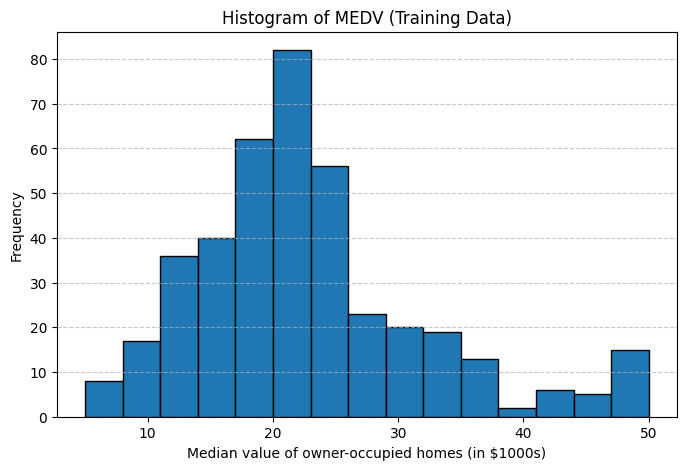

In [ ]:
import matplotlib.pyplot as plt

# Histogram for dependent variable in training data
plt.figure(figsize=(8,5))
plt.hist(y_train, bins=15, edgecolor='black')
plt.title('Histogram of MEDV (Training Data)')
plt.xlabel('Median value of owner-occupied homes (in $1000s)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


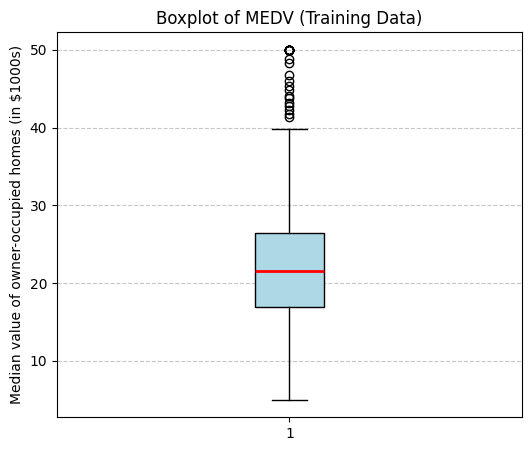

In [ ]:
import matplotlib.pyplot as plt

# Boxplot for dependent variable in training data
plt.figure(figsize=(6,5))
plt.boxplot(y_train, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red', linewidth=2))
plt.title('Boxplot of MEDV (Training Data)')
plt.ylabel('Median value of owner-occupied homes (in $1000s)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


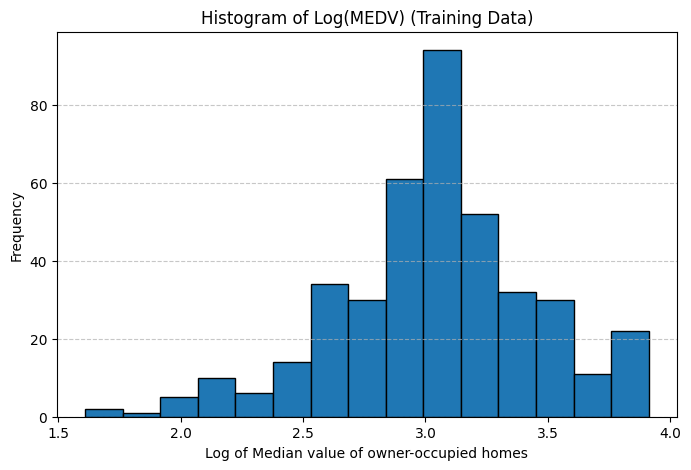

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Log transformation of dependent variable (training data)
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Histogram after log transformation
plt.figure(figsize=(8,5))
plt.hist(y_train_log, bins=15, edgecolor='black')
plt.title('Histogram of Log(MEDV) (Training Data)')
plt.xlabel('Log of Median value of owner-occupied homes')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import statsmodels.formula.api as smf
import numpy as np

# Create a new training DataFrame with log-transformed dependent variable
df_train_log = X_train.copy()
df_train_log['log_medv'] = np.log(y_train)

# Define formula for OLS regression
formula_log = 'log_medv ~ ' + ' + '.join(X.columns)

# Fit the OLS model
model_log = smf.ols(formula=formula_log, data=df_train_log).fit()

# Display summary
print("\nStatsmodels OLS Summary (Log-Transformed DV):\n")
print(model_log.summary())



Statsmodels OLS Summary (Log-Transformed DV):

                            OLS Regression Results                            
Dep. Variable:               log_medv   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     116.9
Date:                Sat, 11 Oct 2025   Prob (F-statistic):          1.35e-125
Time:                        02:04:37   Log-Likelihood:                 106.78
No. Observations:                 404   AIC:                            -185.6
Df Residuals:                     390   BIC:                            -129.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Inte

In [ ]:
#Check Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)


    Feature        VIF
0      crim   1.987996
1        zn   3.075814
2     indus  13.741418
3      chas   1.181392
4       nox  74.807051
5        rm  77.536575
6       age  20.885660
7       dis  15.299778
8       rad  15.204351
9       tax  60.960907
10  ptratio  81.228153
11        b  19.703235
12    lstat  10.597205


In [ ]:
X_train_reduced = X_train.drop(['ptratio', 'rm','nox'], axis=1)
formula_reduced = 'log_medv ~ ' + ' + '.join(X_train_reduced.columns)
model_reduced = smf.ols(formula=formula_reduced, data=df_train_log).fit()
print(model_reduced.summary())


                            OLS Regression Results                            
Dep. Variable:               log_medv   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     113.7
Date:                Sat, 11 Oct 2025   Prob (F-statistic):          2.05e-109
Time:                        02:04:37   Log-Likelihood:                 60.507
No. Observations:                 404   AIC:                            -99.01
Df Residuals:                     393   BIC:                            -55.00
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8074      0.096     39.457      0.0

**Regularization Techniques**

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd


In [ ]:
ridge = Ridge(alpha=1.0)  # alpha = regularization strength
ridge.fit(X_train, y_train)

# Predict on test data
y_pred_ridge = ridge.predict(X_test)

# Evaluation
print("Ridge Regression:")
print("R2 Score:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Ridge Regression:
R2 Score: 0.6662221670168523
RMSE: 4.94744289787246


In [ ]:
lasso = Lasso(alpha=0.1)  # smaller alpha for less shrinkage
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("\nLasso Regression:")
print("R2 Score:", r2_score(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))



Lasso Regression:
R2 Score: 0.6569712802223936
RMSE: 5.015535241022056


In [ ]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio=0.5 balances L1 & L2
elastic.fit(X_train, y_train)

y_pred_elastic = elastic.predict(X_test)

print("\nElastic Net Regression:")
print("R2 Score:", r2_score(y_test, y_pred_elastic))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_elastic)))



Elastic Net Regression:
R2 Score: 0.6667328308555568
RMSE: 4.943656775757523


In [ ]:
# Standard Linear Regression (no regularization)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Combine coefficients into a single DataFrame
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Linear_Coeff': linreg.coef_,
    'Ridge_Coeff': ridge.coef_,
    'Lasso_Coeff': lasso.coef_,
    'ElasticNet_Coeff': elastic.coef_
})

print(coeff_df)


    Feature  Linear_Coeff  Ridge_Coeff  Lasso_Coeff  ElasticNet_Coeff
0      crim     -0.113056    -0.109234    -0.104157         -0.106853
1        zn      0.030110     0.032271     0.034893          0.037015
2     indus      0.040381     0.007498    -0.016785         -0.030900
3      chas      2.784438     2.545470     0.919952          0.977221
4       nox    -17.202633    -9.537952    -0.000000         -0.019932
5        rm      4.438835     4.464505     4.311687          3.764341
6       age     -0.006296    -0.012191    -0.015126         -0.011703
7       dis     -1.447865    -1.338700    -1.151487         -1.176020
8       rad      0.262430     0.248882     0.239237          0.258443
9       tax     -0.010647    -0.011475    -0.012962         -0.013479
10  ptratio     -0.915456    -0.828604    -0.732247         -0.761627
11        b      0.012351     0.012642     0.013091          0.012746
12    lstat     -0.508571    -0.523833    -0.564674         -0.600051


In [ ]:
# Highlight Lasso coefficients that are zero or very close to zero
def highlight_lasso_zero(val):
    if abs(val) < 1e-4:  # threshold for near-zero
        return 'background-color: yellow'
    return ''

# Apply highlighting to the DataFrame
coeff_df.style.applymap(highlight_lasso_zero, subset=['Lasso_Coeff'])


/tmp/ipython-input-665575574.py:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  coeff_df.style.applymap(highlight_lasso_zero, subset=['Lasso_Coeff'])


,Feature,Linear_Coeff,Ridge_Coeff,Lasso_Coeff,ElasticNet_Coeff
0,crim,-0.113056,-0.109234,-0.104157,-0.106853
1,zn,0.030110,0.032271,0.034893,0.037015
2,indus,0.040381,0.007498,-0.016785,-0.030900
3,chas,2.784438,2.545470,0.919952,0.977221
4,nox,-17.202633,-9.537952,-0.000000,-0.019932
5,rm,4.438835,4.464505,4.311687,3.764341
6,age,-0.006296,-0.012191,-0.015126,-0.011703
7,dis,-1.447865,-1.338700,-1.151487,-1.176020
8,rad,0.262430,0.248882,0.239237,0.258443
9,tax,-0.010647,-0.011475,-0.012962,-0.013479
